1->(a)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#Example dataset
data = {
    'Feature1': [1, 2, 3, 4, np.nan , 6, 7, 8, 9, 10],
    'Feature2': [5, 4, 3, 2, 1, 1, 2, 3, 4, 5],
    'Category': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'Target': [10, 20, 15, 25, 30, 40, 35, 45, 50, 60]
}

df = pd.DataFrame(data)

#Checking for missing values
print(df.isnull().sum())

#Handling missing values (for example, fill with mean)
df['Feature1'].fillna(df['Feature1'].mean(), inplace=True)

#Splitting the data into features (X) and the target variable (y)
X = df[['Feature1', 'Feature2', 'Category']]
y = df['Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Feature1    1
Feature2    0
Category    0
Target      0
dtype: int64


b

In [ ]:
summary_stats = df.describe()
print(summary_stats)

        Feature1   Feature2    Target
count  10.000000  10.000000  10.00000
mean    5.555556   3.000000  33.00000
std     3.022549   1.490712  16.02082
min     1.000000   1.000000  10.00000
25%     3.250000   2.000000  21.25000
50%     5.777778   3.000000  32.50000
75%     7.750000   4.000000  43.75000
max    10.000000   5.000000  60.00000


c

In [ ]:
X = df[['Feature1', 'Feature2', 'Category']]
y = df['Target']


d

In [ ]:
X_encoded = pd.get_dummies(X, columns=['Category'])


e

<ipython-input-13-836a375373b5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

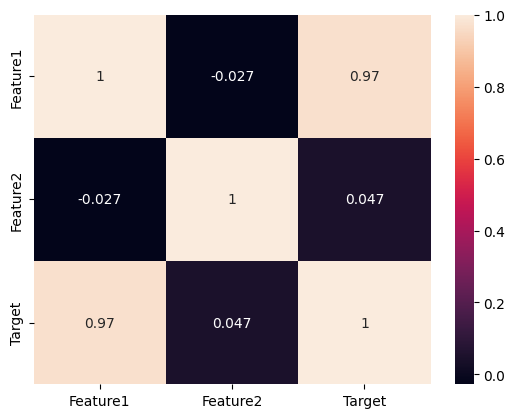

In [ ]:
correlation_matrix = df.corr()

import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)


2->a

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} MSE: {mse}")
# Optionally, you can train Polynomial Regression as well
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred = poly_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Polynomial Regression MSE: {mse}")


Linear Regression MSE: 4.935082500334951
Ridge Regression MSE: 4.785219382729705
Lasso Regression MSE: 17.222238462825285
Polynomial Regression MSE: 41.18630226775435


b

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} with Scaling MSE: {mse}")
# For Polynomial Regression with scaling
poly_model_scaled = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model_scaled.fit(X_train_scaled, y_train)
y_pred = poly_model_scaled.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Polynomial Regression with Scaling MSE: {mse}")


Linear Regression with Scaling MSE: 4.935082500334968
Ridge Regression with Scaling MSE: 18.801623188962147
Lasso Regression with Scaling MSE: 8.706374017881505
Polynomial Regression with Scaling MSE: 41.795183302322556


3->a,b,c

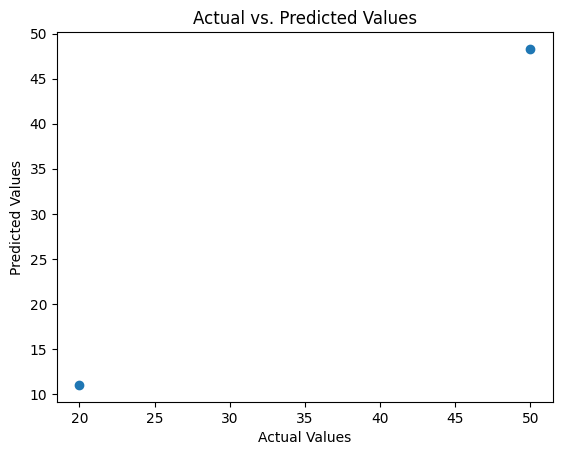

In [ ]:
# Visualize the predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

d

In [ ]:
#Taking a random test sample (for example, the first row) and predict its value.
sample = X_test_scaled[0].reshape(1, -1)  # We need to reshape it if you're using a scaler
sample_prediction = poly_model_scaled.predict(sample)
print(f"Predicted Value for Sample: {sample_prediction[0]}")

Predicted Value for Sample: 48.2960094600433
